<a href="https://colab.research.google.com/github/Shouvic-Banik19/micro/blob/main/machine3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os


In [2]:
import cv2
import imghdr

In [7]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import pandas as pd

In [16]:
data_dir = '/content/drive/My Drive/data'

In [17]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [18]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
data = tf.keras.utils.image_dataset_from_directory(r'/content/drive/My Drive/data')


Found 305 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [22]:
batch = data_iterator.next()

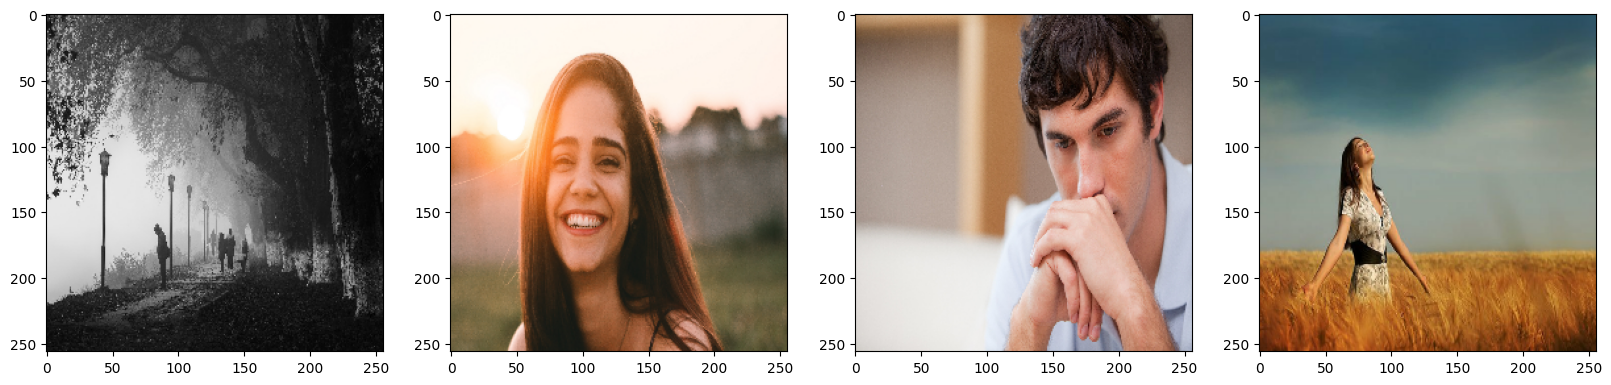

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title


In [26]:
data = data.map(lambda x,y: (x/255, y))

In [27]:
data.as_numpy_iterator().next()

(array([[[[0.7921569 , 0.8392157 , 0.8392157 ],
          [0.79247856, 0.8395374 , 0.8395374 ],
          [0.7966146 , 0.8436734 , 0.8436734 ],
          ...,
          [0.37201285, 0.06613051, 0.05828738],
          [0.36534926, 0.06666667, 0.06602328],
          [0.3647059 , 0.06666667, 0.06666667]],
 
         [[0.75758666, 0.80239564, 0.8068954 ],
          [0.7629773 , 0.8098464 , 0.8102259 ],
          [0.77474844, 0.8198104 , 0.82380414],
          ...,
          [0.37201285, 0.06613051, 0.05828738],
          [0.36534926, 0.06666667, 0.06602328],
          [0.36695576, 0.06891653, 0.06891653]],
 
         [[0.739684  , 0.78289455, 0.7930048 ],
          [0.7458803 , 0.7914784 , 0.7946034 ],
          [0.7586953 , 0.80219907, 0.8114515 ],
          ...,
          [0.37325367, 0.06737132, 0.05952819],
          [0.36659008, 0.0690465 , 0.06498604],
          [0.36976102, 0.07296262, 0.0692402 ]],
 
         ...,
 
         [[0.6901961 , 0.49803922, 0.37254903],
          [0.69051

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [29]:
train_size

7

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [31]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
logdir='logs'

In [38]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [39]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.5068 - loss: 1.2868 - val_accuracy: 0.7344 - val_loss: 0.6586
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.6122 - loss: 0.6503 - val_accuracy: 0.7344 - val_loss: 0.6200
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7155 - loss: 0.5961 - val_accuracy: 0.8594 - val_loss: 0.4713
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.7464 - loss: 0.5517 - val_accuracy: 0.9219 - val_loss: 0.3981
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8137 - loss: 0.4035 - val_accuracy: 0.8906 - val_loss: 0.2868
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.8781 - loss: 0.3524 - val_accuracy: 0.9531 - val_loss: 0.2044
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9366 - loss: 0.2224 - val_accuracy: 0.9375 - val_loss: 0.1836
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9504 - loss: 0.2068 - val_accuracy: 0.9688 - val_loss: 0.1166
Epoch 9/

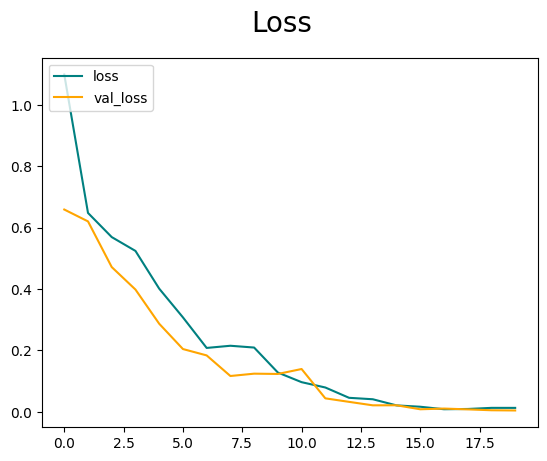

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

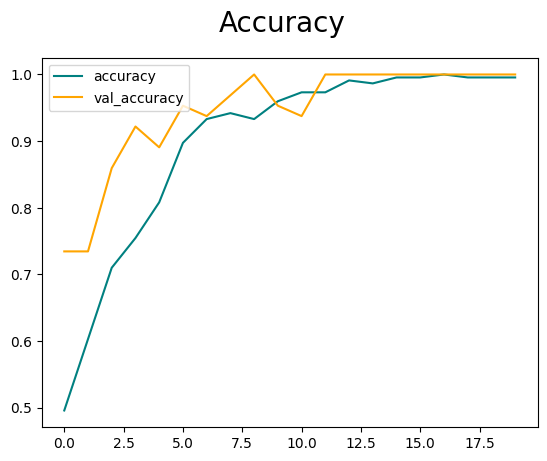

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [44]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [45]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


In [46]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [49]:
import cv2
import matplotlib.pyplot as plt

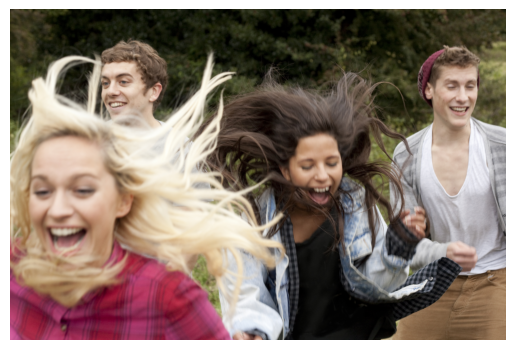

In [50]:

image_path = '/content/drive/My Drive/154006829.jpg'  # Update this path


img = cv2.imread(image_path)


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.axis('off')
plt.show()

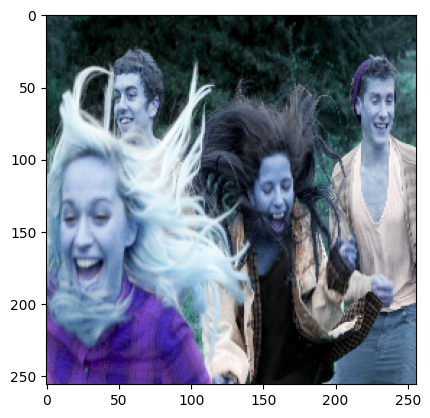

In [51]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [52]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


In [53]:
yhat

array([[0.1936506]], dtype=float32)

In [54]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [63]:
new_model = load_model(os.path.join('models', 'imageclassifier.keras'), compile=False)
new_model.compile(optimizer=RMSprop(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
resize = resize / 255.0
image_input = np.expand_dims(resize, axis=0)
predictions = new_model.predict(image_input)
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[[0.9999995]]
